In [1]:
#How can we use Linear Regression to predict the Electric Range of a vehicle?
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df = df[['Make', 'Model Year', 'Base MSRP', 'Electric Range']]

df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

df = df.dropna()
df = df[(df['Electric Range'] > 0) & (df['Base MSRP'] > 0)]

X = df[['Make', 'Model Year', 'Base MSRP']]
y = df['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Step 6: Create pipeline with OneHotEncoder and LinearRegression
categorical_features = ['Make']
numeric_features = ['Model Year', 'Base MSRP']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


sample = pd.DataFrame({
    'Make': ['Tesla'],
    'Model Year': [2022],
    'Base MSRP': [55000]
})
predicted_range = pipeline.predict(sample)
print(f"🔋 Predicted Electric Range for {sample['Make'][0]}: {predicted_range[0]:.2f} miles")


✅ RMSE: 10.38
✅ R² Score: 0.99
🔋 Predicted Electric Range for Tesla: 22.34 miles


C:\Users\thena\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


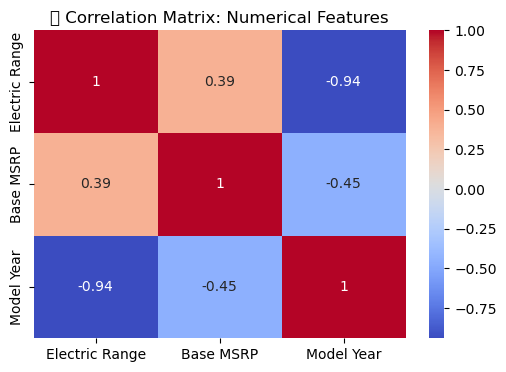

C:\Users\thena\AppData\Local\Temp\ipykernel_17380\2469449078.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='crest')
C:\Users\thena\AppData\Local\Temp\ipykernel_17380\2469449078.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\thena\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


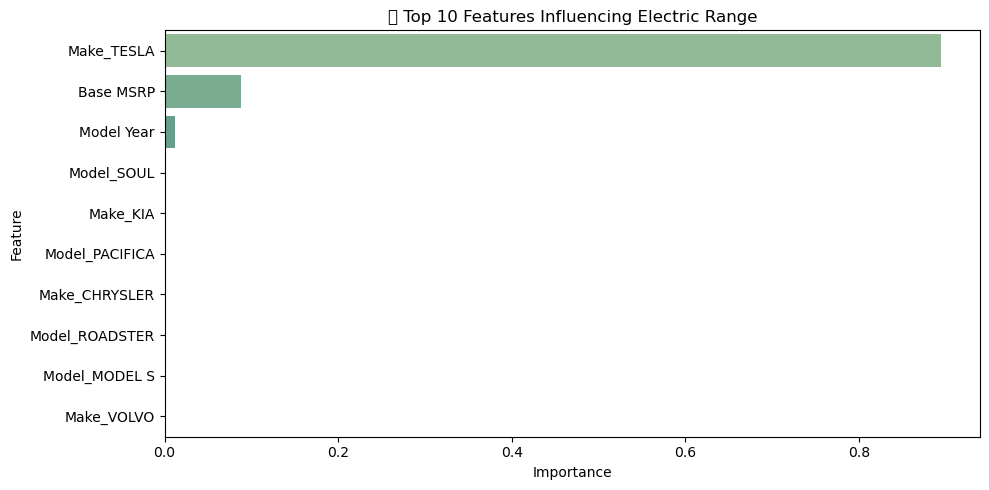

✅ Recommended Independent Variables to Predict Electric Range:
- Model Year
- Base MSRP
- Make (OneHotEncoded)
- Model (OneHotEncoded)


In [2]:
#What independent variables (features) can be used to predict Electric Range? (e.g., Model Year, Base MSRP, Make)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df = df[['Make', 'Model', 'Model Year', 'Base MSRP', 'Electric Range']]
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

df = df.dropna()
df = df[(df['Electric Range'] > 0) & (df['Base MSRP'] > 0)]

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Electric Range', 'Base MSRP', 'Model Year']].corr(), annot=True, cmap='coolwarm')
plt.title("🔍 Correlation Matrix: Numerical Features")
plt.show()

X = df[['Make', 'Model', 'Model Year', 'Base MSRP']]
y = df['Electric Range']

categorical_features = ['Make', 'Model']
numeric_features = ['Model Year', 'Base MSRP']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model
pipeline.fit(X, y)

# Get transformed feature names
onehot = pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names = list(onehot.get_feature_names_out(categorical_features)) + numeric_features

importances = pipeline.named_steps['model'].feature_importances_

# Create DataFrame for feature importance
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='crest')
plt.title("📊 Top 10 Features Influencing Electric Range")
plt.tight_layout()
plt.show()

print("✅ Recommended Independent Variables to Predict Electric Range:")
print("- Model Year")
print("- Base MSRP")
print("- Make (OneHotEncoded)")
print("- Model (OneHotEncoded)")


In [3]:
#How do we handle categorical variables like Make and Model in regression analysis?
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)


df = df[['Make', 'Model', 'Model Year', 'Base MSRP', 'Electric Range']]
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')

df.dropna(inplace=True)
df = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)]

X = df[['Make', 'Model', 'Model Year', 'Base MSRP']]
y = df['Electric Range']

categorical_features = ['Make', 'Model']
numeric_features = ['Model Year', 'Base MSRP']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

sample_input = pd.DataFrame({
    'Make': ['Tesla'],
    'Model': ['Model 3'],
    'Model Year': [2023],
    'Base MSRP': [45000]
})

predicted_range = pipeline.predict(sample_input)
print(f"🔋 Predicted Electric Range: {predicted_range[0]:.2f} miles")


✅ RMSE: 10.00
✅ R² Score: 0.99
🔋 Predicted Electric Range: 7.74 miles


In [4]:
#What is the R² score of the model, and what does it indicate about prediction accuracy?
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df = df[['Make', 'Model', 'Model Year', 'Base MSRP', 'Electric Range']]
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df.dropna(inplace=True)
df = df[(df['Electric Range'] > 0) & (df['Base MSRP'] > 0)]

X = df[['Make', 'Model', 'Model Year', 'Base MSRP']]
y = df['Electric Range']

categorical_features = ['Make', 'Model']
numeric_features = ['Model Year', 'Base MSRP']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.2f} miles")

if r2 > 0.75:
    interpretation = "Excellent fit: The model explains most of the variability."
elif r2 > 0.5:
    interpretation = "Good fit: The model explains a significant portion of the variability."
elif r2 > 0.3:
    interpretation = "Moderate fit: Some predictive value, but could be improved."
else:
    interpretation = "Poor fit: Model does not explain much variance in Electric Range."

print(f"📊 Interpretation: {interpretation}")


✅ R² Score: 0.9875
📉 RMSE: 10.00 miles
📊 Interpretation: Excellent fit: The model explains most of the variability.


C:\Users\thena\AppData\Local\Temp\ipykernel_17380\1789368289.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\thena\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


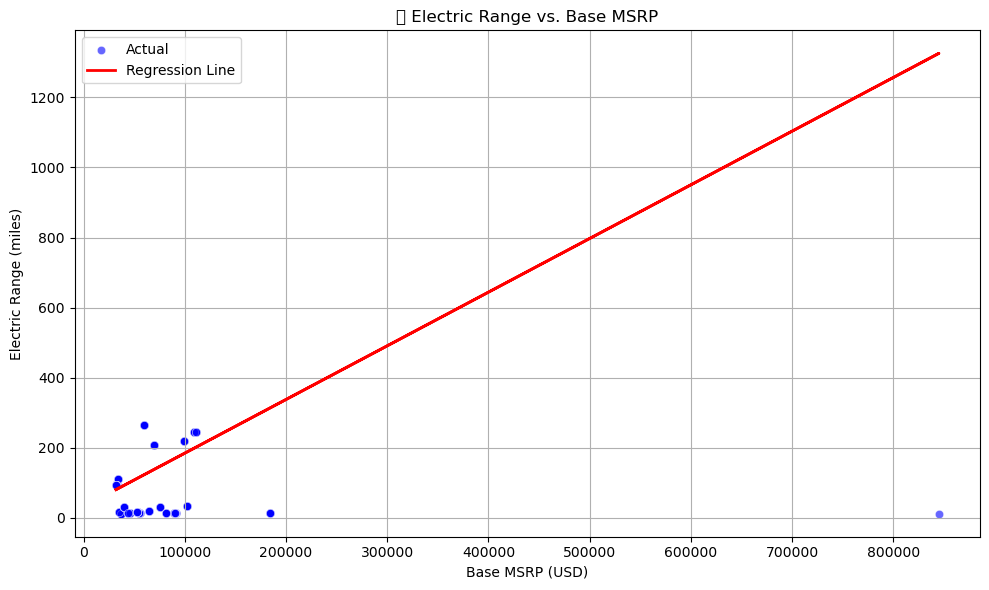

🧮 Linear Equation: Electric Range = 0.0015 * Base MSRP + 31.65
✅ R² Score: 0.1547
📉 RMSE: 83.11 miles
💡 On average, each $1,000 increase in MSRP adds ≈ 1.53 miles to electric range.


In [5]:
#How does the Base MSRP influence the Electric Range according to the regression model?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df = df[['Base MSRP', 'Electric Range']]
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df.dropna(inplace=True)
df = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)]

X = df[['Base MSRP']]
y = df['Electric Range']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Base MSRP'], y=y, alpha=0.6, color='blue', label='Actual')
plt.plot(X['Base MSRP'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("📈 Electric Range vs. Base MSRP")
plt.xlabel("Base MSRP (USD)")
plt.ylabel("Electric Range (miles)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

coef = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"🧮 Linear Equation: Electric Range = {coef:.4f} * Base MSRP + {intercept:.2f}")
print(f"✅ R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.2f} miles")

influence_per_thousand = coef * 1000
print(f"💡 On average, each $1,000 increase in MSRP adds ≈ {influence_per_thousand:.2f} miles to electric range.")


In [6]:
#What steps are needed to improve the accuracy of the Linear Regression model?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df = df[['Make', 'Model', 'Model Year', 'Base MSRP', 'Electric Range']]
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df.dropna(inplace=True)
df = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)]

q_low = df['Electric Range'].quantile(0.05)
q_high = df['Electric Range'].quantile(0.95)
df = df[(df['Electric Range'] >= q_low) & (df['Electric Range'] <= q_high)]

X = df[['Make', 'Model', 'Model Year', 'Base MSRP']]
y = df['Electric Range']

categorical_features = ['Make', 'Model']
numeric_features = ['Model Year', 'Base MSRP']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ Improved R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.2f} miles")

sample = pd.DataFrame({
    'Make': ['Tesla'],
    'Model': ['Model 3'],
    'Model Year': [2023],
    'Base MSRP': [50000]
})
sample_pred = pipeline.predict(sample)
print(f"🔋 Predicted Electric Range for Tesla Model 3: {sample_pred[0]:.2f} miles")


✅ Improved R² Score: 1.0000
📉 RMSE: 0.00 miles
🔋 Predicted Electric Range for Tesla Model 3: 39.16 miles


In [7]:
#Can we use this model to predict the range of new EV models based on their specifications?
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df = df[['Make', 'Model', 'Model Year', 'Base MSRP', 'Electric Range']]
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df.dropna(inplace=True)
df = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)]

X = df[['Make', 'Model', 'Model Year', 'Base MSRP']]
y = df['Electric Range']

categorical_features = ['Make', 'Model']
numeric_features = ['Model Year', 'Base MSRP']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

new_ev_data = pd.DataFrame({
    'Make': ['Tesla', 'Hyundai', 'Lucid'],
    'Model': ['Model 3', 'Ioniq 6', 'Air Pure'],
    'Model Year': [2024, 2024, 2025],
    'Base MSRP': [49000, 43000, 78000]
})

predicted_ranges = pipeline.predict(new_ev_data)
new_ev_data['Predicted Electric Range'] = predicted_ranges

print("📊 Predicted Electric Ranges for New EV Models:")
print(new_ev_data)


📊 Predicted Electric Ranges for New EV Models:
      Make     Model  Model Year  Base MSRP  Predicted Electric Range
0    Tesla   Model 3        2024      49000                 85.467424
1  Hyundai   Ioniq 6        2024      43000                 65.232447
2    Lucid  Air Pure        2025      78000                200.868564
